**Aim:** Apply k-Means clustering algorithm on suitable datasets and comment on the quality of
clustering.


**Theory:** k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.

**Code:**

Dataset Used is **Iris Dataset**<br>
Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('datasets_19_420_Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
cluster_data = df[['SepalLengthCm','PetalLengthCm']].copy(deep=True)
cluster_data.dropna(axis=0, inplace=True)
cluster_data.sort_values(by=['SepalLengthCm','PetalLengthCm'], inplace=True)
cluster_array = np.array(cluster_data)

In [5]:
cluster_array

array([[4.3, 1.1],
       [4.4, 1.3],
       [4.4, 1.3],
       [4.4, 1.4],
       [4.5, 1.3],
       [4.6, 1. ],
       [4.6, 1.4],
       [4.6, 1.4],
       [4.6, 1.5],
       [4.7, 1.3],
       [4.7, 1.6],
       [4.8, 1.4],
       [4.8, 1.4],
       [4.8, 1.6],
       [4.8, 1.6],
       [4.8, 1.9],
       [4.9, 1.4],
       [4.9, 1.5],
       [4.9, 1.5],
       [4.9, 1.5],
       [4.9, 3.3],
       [4.9, 4.5],
       [5. , 1.2],
       [5. , 1.3],
       [5. , 1.4],
       [5. , 1.4],
       [5. , 1.5],
       [5. , 1.6],
       [5. , 1.6],
       [5. , 1.6],
       [5. , 3.3],
       [5. , 3.5],
       [5.1, 1.4],
       [5.1, 1.4],
       [5.1, 1.5],
       [5.1, 1.5],
       [5.1, 1.5],
       [5.1, 1.6],
       [5.1, 1.7],
       [5.1, 1.9],
       [5.1, 3. ],
       [5.2, 1.4],
       [5.2, 1.5],
       [5.2, 1.5],
       [5.2, 3.9],
       [5.3, 1.5],
       [5.4, 1.3],
       [5.4, 1.5],
       [5.4, 1.5],
       [5.4, 1.7],
       [5.4, 1.7],
       [5.4, 4.5],
       [5.5,

# K-Means Implementation

In [6]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [7]:
# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

In [8]:
# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [9]:
# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [10]:
k = 3
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 56.0
1 36.0
2 36.0
3 36.0
4 36.0
5 36.0
6 36.0
7 36.0
8 36.0
9 36.0
10 36.0
11 36.0
12 36.0
13 36.0
14 36.0
15 36.0
16 36.0
17 36.0
18 36.0
19 36.0
20 36.0


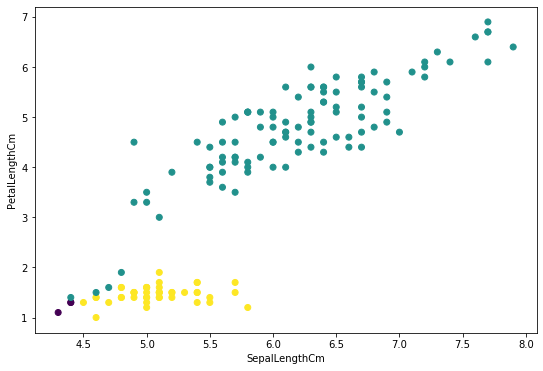

In [16]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=initial_clusters );
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm');
plt.savefig('initial_clusters', bpi=150)

**Comments:** The following plot shows that the key characteristic of the 3 different species and one can see that K means has unkowingly clustered a large part to one cluster and also points closed to the 2nd cluster are being incorrectly clustered so in different case a lot of the clustering depends upon the datasets used and the features.